In [142]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [143]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv")

In [144]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
df = df[['Age','Fare','Survived']]

In [146]:
df.isnull().sum()

Age         86
Fare         1
Survived     0
dtype: int64

In [147]:
## Random sample imputation can be done only if the data is following MCAR concepts 

In [148]:
s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)

In [149]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [150]:
## we need to replace the values 

In [151]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [152]:
df['Age'][10]

nan

In [153]:
df[df['Age'].isnull()].index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [154]:
x = df[df['Age'].isnull()].head(1)
x

,Age,Fare,Survived
10,NaN,7.8958,0


In [155]:
def random(df , variable):
    df[variable+"_replaced"] = df[variable].copy()
    s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull() , 'Age_replaced'] = s
    
    
    

In [156]:
random(df,'Age')

In [157]:
df.isnull().sum()

Age             86
Fare             1
Survived         0
Age_replaced     0
dtype: int64

<AxesSubplot:>

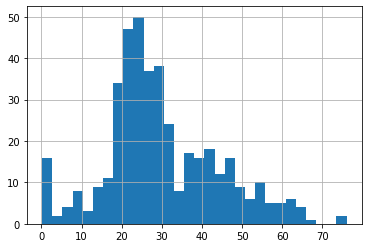

In [158]:
df['Age_replaced'].hist(bins = 30)

In [159]:
value = df['Age_replaced'].max() - df['Age_replaced'].min() 

In [160]:
value

75.83

Formula = max(fearture) - min(feature) / Number of bins we want to create 

In [51]:
value / 10

7.583

In [52]:
range_values = np.round(value / 10)
range_values

8.0

In [60]:
lower = np.floor(df['Age_replaced'].min())
upper = np.round(df['Age_replaced'].max())


In [62]:
lower = int(lower)
lower

0

In [63]:
upper = int(upper)
upper

76

In [64]:
range_values = int(range_values)

In [65]:
range_values

8

In [70]:
li = [i for i in range(lower,upper+range_values,range_values)]

print(li)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]


In [72]:
res = ['Bins_'+str(j) for j in range(1, len(li))]
res

['Bins_1',
 'Bins_2',
 'Bins_3',
 'Bins_4',
 'Bins_5',
 'Bins_6',
 'Bins_7',
 'Bins_8',
 'Bins_9',
 'Bins_10']

In [73]:
df['Age_Equal_width'] = pd.cut(x = df['Age_replaced'] , bins=li)

In [77]:
df['Age_Equal_width_names'] = pd.cut(x = df['Age_replaced'] , labels=res , bins = li)

In [78]:
df.head()

,Age,Fare,Survived,Age_replaced,Age_Equal_width,Age_Equal_width_names
0,34.5,7.8292,0,34.5,"(32, 40]",Bins_5
1,47.0,7.0000,1,47.0,"(40, 48]",Bins_6
2,62.0,9.6875,0,62.0,"(56, 64]",Bins_8
3,27.0,8.6625,0,27.0,"(24, 32]",Bins_4
4,22.0,12.2875,1,22.0,"(16, 24]",Bins_3


In [79]:
df.groupby(['Age_Equal_width'])['Age_replaced'].count()

Age_Equal_width
(0, 8]       24
(8, 16]      21
(16, 24]    123
(24, 32]    105
(32, 40]     49
(40, 48]     48
(48, 56]     25
(56, 64]     20
(64, 72]      1
(72, 80]      2
Name: Age_replaced, dtype: int64

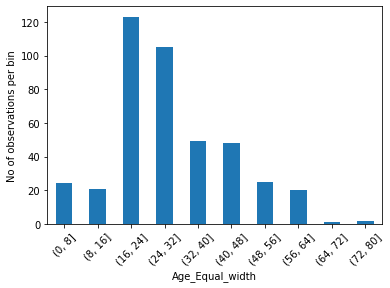

In [81]:
df.groupby(['Age_Equal_width'])['Age_replaced'].count().plot.bar()
plt.xticks(rotation = 45)
plt.ylabel('No of observations per bin')
plt.show()

### using Feature-engine 

In [101]:
df.isnull().sum()

Age             86
Fare             1
Survived         0
Age_replaced     0
dtype: int64

In [105]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [107]:
reg = EqualWidthDiscretiser(bins = 10 , variables = ['Age_replaced'])

In [108]:
reg.fit(df)

EqualWidthDiscretiser(variables=['Age_replaced'])

In [109]:
reg.binner_dict_

{'Age_replaced': [-inf,
  7.753,
  15.336,
  22.919000000000004,
  30.502000000000002,
  38.085,
  45.668000000000006,
  53.251000000000005,
  60.834,
  68.417,
  inf]}

In [112]:
df = reg.transform(df)

In [113]:
df.head()

,Age,Fare,Survived,Age_replaced
0,34.5,7.8292,0,4
1,47.0,7.0000,1,6
2,62.0,9.6875,0,8
3,27.0,8.6625,0,3
4,22.0,12.2875,1,2


### Using sklearn

In [161]:
from sklearn.preprocessing import KBinsDiscretizer

In [168]:
reg = KBinsDiscretizer(n_bins=10 , strategy='uniform',encode='ordinal')

In [169]:
reg.fit(df['Age_replaced'].values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [170]:
reg.bin_edges_

array([array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
       60.834, 68.417, 76.   ])], dtype=object)

In [171]:
df['Age_sklearn'] = reg.transform(df['Age_replaced'].values.reshape(-1,1))

In [172]:
df.head()

,Age,Fare,Survived,Age_replaced,Age_sklearn
0,34.5,7.8292,0,34.5,4.0
1,47.0,7.0000,1,47.0,6.0
2,62.0,9.6875,0,62.0,8.0
3,27.0,8.6625,0,27.0,3.0
4,22.0,12.2875,1,22.0,2.0


In [173]:
df['Age_sklearn'].unique()

array([4., 6., 8., 3., 2., 1., 5., 7., 0., 9.])